<a href="https://colab.research.google.com/github/janiosl/python.ds/blob/master/ml/cursoPyML/PyML_04_Clustering_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python DS: Curso de Aprendizado de Máquina com Python

# Aula 04: Clustering - Density based methods (DBSCAN)

* Aulas disponíveis em: https://www.youtube.com/playlist?list=PL0XxTDj23A1HYVt2EOttKvaE8UzQoAh3A

* Alguns exemplos foram adaptados a partir de desafios propostos nas disciplinas Mineração de Dados, ministrada pelo Prof. Eduardo Ogasawara e Aprendizado de Máquina, ministrada pelo Prof. Eduardo Bezerra, ambas disciplinas do Mestrado em Ciência da Computação com ênfase em Ciência de Dados do [Programa PPCIC do CEFET/RJ](https://eic.cefet-rj.br/ppcic/).

##1 Introdução

* Density based methods:
Métodos que conseguem lidar de maneira mais acurada com agrupamentos com aspecto não esférico. Eles conseguem melhores resultados porque não avaliam apenas a proximidade dos pontos, mas compara regiões com mais densidade em comparação com regiões com dados mais esparsos. A Figura 1 apresenta alguns exemplos de visualização de dados em que métodos com k-Means podem ter dificuldades para encontrar os grupos [Han et al., 2012]. 

![](https://www.researchgate.net/profile/S-Thilagamani/publication/326466940/figure/fig1/AS:784421200343041@1564031996682/Clusters-of-arbitrary-shape_W640.jpg)

Figura 1 - Clusters of aribrary shape [Han et al, 2012]






## 2 Obtendo dados e preparando dados

In [1]:
#Importação do módulo desejado
from google.colab import files

In [2]:
#Realizar upload
carregados = files.upload()

#Exibição do resultado do upoload
for fn in carregados.keys():
  name = fn
  tamanho = len(carregados[fn])
  print(f'\nArquivo carregado: {name}\nTamanho: {tamanho} bytes')

Saving ex7data2.mat to ex7data2.mat

Arquivo carregado: ex7data2.mat
Tamanho: 4784 bytes


In [3]:
#Biblioteca para carga dos dados
import scipy.io as spio

In [4]:
#Dataset de exemplo disponível em: 'https://github.com/MLRG-CEFET-RJ/ml-class/raw/master/ml-t2/data/ex7data2.mat'
arquivo = 'ex7data2.mat'
colunas = ['X']

In [5]:
raw_mat = spio.loadmat(arquivo)
X = raw_mat.get('X')

In [6]:
X[:5]

array([[1.84207953, 4.6075716 ],
       [5.65858312, 4.79996405],
       [6.35257892, 3.2908545 ],
       [2.90401653, 4.61220411],
       [3.23197916, 4.93989405]])

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns

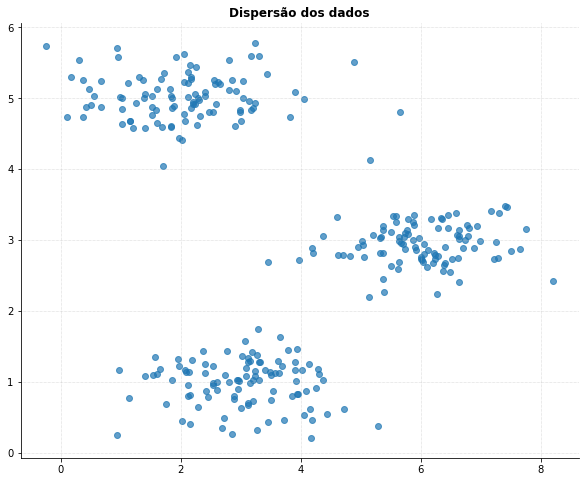

In [8]:
plt.figure(figsize=(10,8))
plt.grid(color='0.7', linestyle=':', linewidth=0.5)

#Dispersão dos dados
plt.scatter(X[:, 0], X[:, 1], marker='o', alpha=0.7)
plt.title('Dispersão dos dados', fontweight='bold')

sns.despine()

#plt.savefig('target/plot3.1.png')

## 3 Criando e treinando um modelo

In [9]:
#Importando o algoritmo que será usado como base
from sklearn.cluster import DBSCAN

In [10]:
#Criação do modelo
#modelo = DBSCAN(eps=0.7, min_samples=5)
#modelo = DBSCAN(eps=0.3, min_samples=5)
#modelo = DBSCAN(eps=0.3, min_samples=10)
modelo = DBSCAN(eps=0.4, min_samples=10)

In [11]:
#Conferência do moddelo
modelo

DBSCAN(eps=0.4, min_samples=10)

## 4 Aplicando o modelo treinado

In [12]:
#Uso do modelo para identificação/definição dos grupos
###
#APLICAR UMA DAS ABORDAGENS ABAIXO
###

#Treinando e recuperando os rótulos dos grupos
#modelo.fit(X)
#y_pred = modelo.labels_

#Realizando a recuperação direta dos rótulos
y_pred = modelo.fit_predict(X)

In [13]:
y_pred

array([ 0, -1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  2,  2,
        2, -1,  2,  2,  2,  2, -1, -1,  2, -1,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2, -1,  2,  2,  2,  2,  2,  2,  2, -1,  2, -1,  2,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1

In [14]:
labels = modelo.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

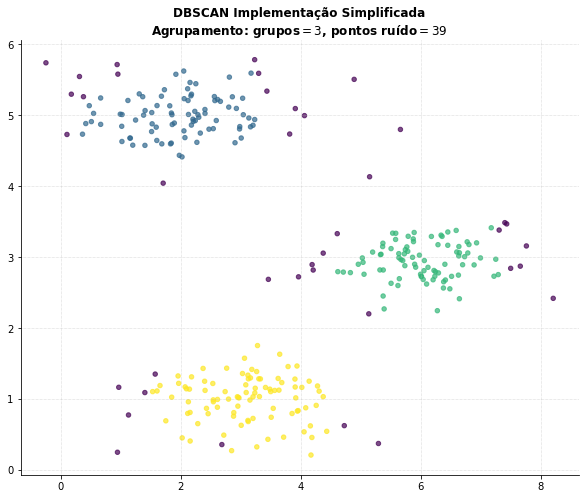

In [15]:
#Visualização do resultado do agrupamento
plt.figure(figsize=(10,8))
plt.grid(color='0.7', linestyle=':', linewidth=0.5)

#Plotagem da dispersão com cores para diferenciar os grupos
#Neste gráfico usamos os grupos previstos para definir a cor dos grupos
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=20, cmap='viridis', alpha=0.7)


#Configurações visuais adicionais
plt.title(f'DBSCAN Implementação Simplificada\nAgrupamento: grupos$={n_clusters_}$, pontos ruído$={n_noise_}$',
          fontweight='bold')


sns.despine()

#plt.savefig('target/plot3.1.1.png')

##Não é mágica!

A figura abaixo ilustra como diferentes algoritmos podem apresentar resultados similares em alguns casos e extremamente diferentes em outros para o mesmo conjunto de dados. Em resumo, podemos intepretar que a imagem nos indica que não há mágica na seleção de um algoritmo, mas a necessidade de experimentar, explorar os dados e integrar a aplicação de métodos e algoritmos com o conhecimento da área de domínio e do problema que se quer resolver.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png)

Figura 2 - Comparing different clustering algorithms on toy datasets

## Referências

Bezerra, Eduardo (2016) **Introdução à Aprendizagem Profunda**. Disponível em: https://www.researchgate.net/publication/309321510_Introducao_a_Aprendizagem_Profunda, julho de 2020.

Géron, Aurélien (2019). **Mãos à Obra Aprendizagem de Máquina com Scikit-Learn & TensorFlow:** Conceitos, ferramentas e técnicas para a construção de sistemas inteligentes. Traduzido por Rafael Contatori. Alta Books.

Grus, Joel (2016). **Data Science do Zero:** Primeiras regras com Python. Traduzido por Welington Nascimento. Alta Books.

Han, Jiawei. Kamber, Micheline. Pei, Jian (2012) **Data Mining**: Concepts and techniques. Morgan Kaufmann, 3rd Edition.

McKinney, Wes (2018). **Python para Análise de Dados**: tratamento de dados com pandas, numpy e iPython. Traduzido por Lúcia A. Kinoshita. Novatec.


---

**Leitura complementar e tutoriais**:
* Documentação Scikit-Learn sobre agrupamento: https://scikit-learn.org/stable/modules/clustering.html
* Documentação Scikit-Learn sobre DBSCAN: https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py
* Playlist Mineração de Dados (Prof. Eduardo Ogasawara - Mestrado PPCIC): https://www.youtube.com/playlist?list=PLTy3TWJeueGw1eeP1cvaIiTzJrIljcVAq
* Tutorial sobre agrupamento (Prof. Eduardo Bezerra - Mestrado PPCIC): https://github.com/MLRG-CEFET-RJ/ml-class/blob/master/ml_clustering.ipynb
